In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Set the path to your vowel data
data_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"

# Output directory to save MFCC plots
output_path = os.path.join(data_path, "mfcc_visualizations")
os.makedirs(output_path, exist_ok=True)

# Function to extract and visualize MFCCs
def extract_and_plot_mfcc(file_path, output_img_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs (13 is a common number of coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Plotting the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(label='Coefficient Magnitude')
    plt.title(f"MFCC - {os.path.basename(file_path)}")
    plt.ylabel("MFCC Coefficients")
    plt.xlabel("Time (frames)")
    plt.tight_layout()
    plt.savefig(output_img_path)
    plt.close()

# Process all audio files in the folder



In [2]:
for filename in os.listdir(data_path):
    if filename.endswith(".wav") or filename.endswith(".mp3"):
        full_path = os.path.join(data_path, filename)
        output_img = os.path.join(output_path, f"{os.path.splitext(filename)[0]}_mfcc.png")
        extract_and_plot_mfcc(full_path, output_img)
        print(f"Processed: {filename}")

print("✅ MFCC extraction and visualization completed.")

✅ MFCC extraction and visualization completed.


C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\380336159.py:38: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=None)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\380336159.py:38: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=None)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


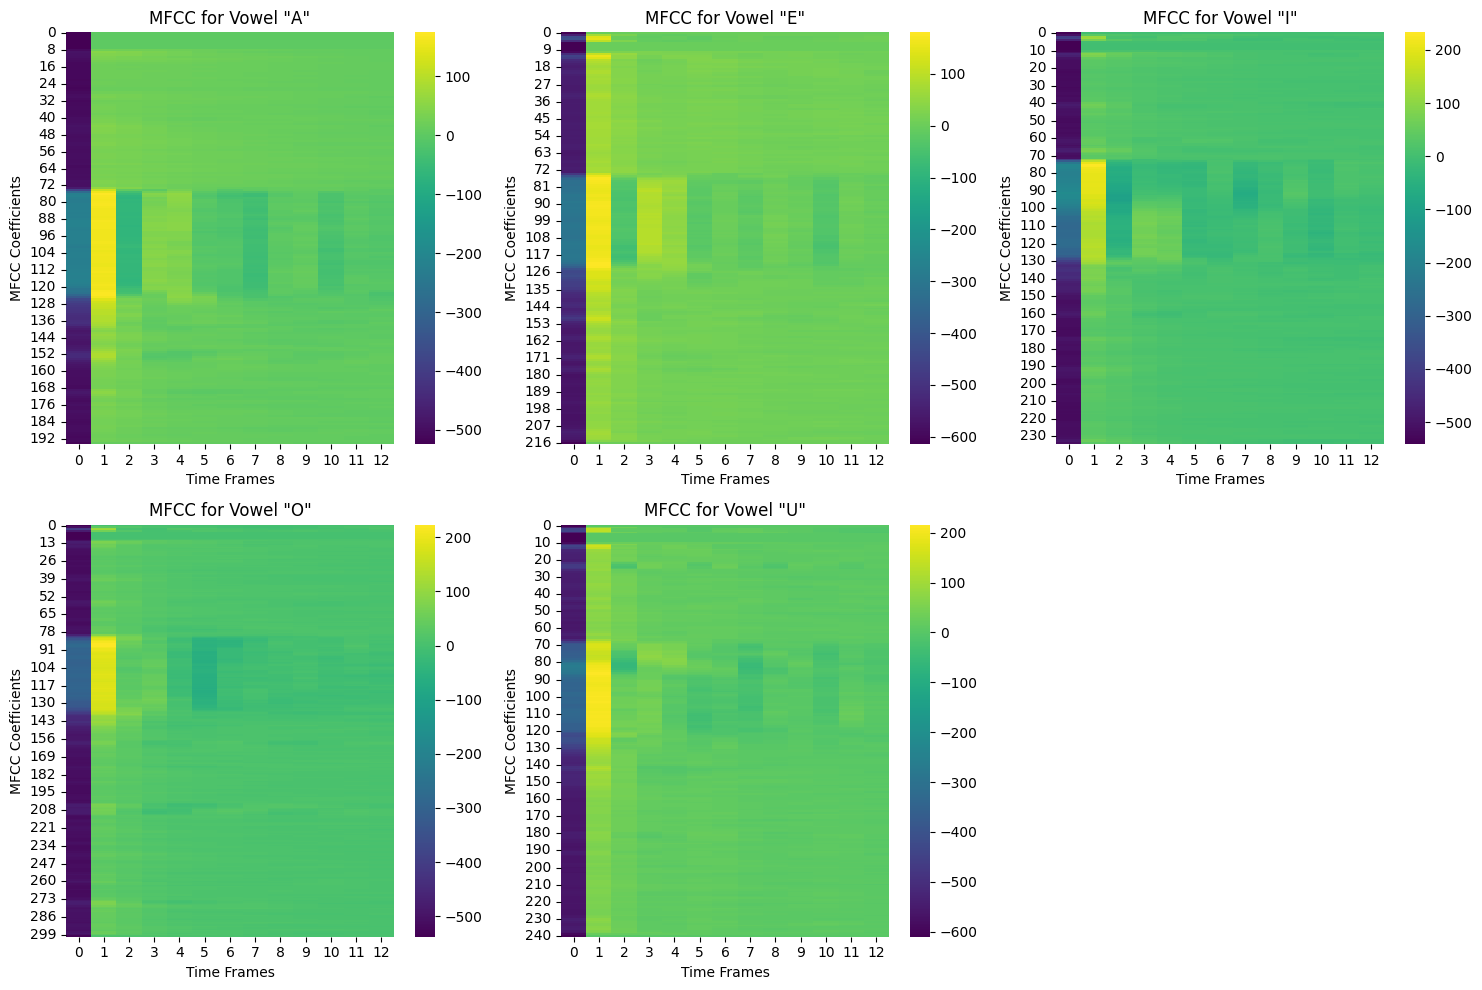

In [6]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set folder path and initialize lists
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"
audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]

# Check if files are found
if not audio_files:
    raise ValueError(f"No .wav or .m4a files found in: {folder_path}")

# Map vowels to numeric labels
label_map = {
    'a': 0,
    'e': 1,
    'i': 2,
    'o': 3,
    'u': 4
}

# Initialize lists to store features and labels
mfcc_features_list = []
labels = []

# Extract MFCC features and labels
for file_name in audio_files:
    # Extract vowel label from filename (assuming filename starts with vowel)
    vowel = file_name.lower()[0]
    if vowel not in label_map:
        print(f"Skipping file {file_name}: Unknown vowel")
        continue
    
    # Load audio file
    file_path = os.path.join(folder_path, file_name)
    signal, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCC features
    mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13).T
    
    # Store features and labels
    mfcc_features_list.append(mfcc_features)
    labels.append(label_map[vowel])
    
# Visualize MFCC features for each vowel
plt.figure(figsize=(15, 10))
for i, vowel in enumerate(label_map.keys()):
    # Find first file corresponding to this vowel
    for file_name, mfcc, label in zip(audio_files, mfcc_features_list, labels):
        if file_name.lower().startswith(vowel):
            plt.subplot(2, 3, i + 1)
            sns.heatmap(mfcc, cmap='viridis')
            plt.title(f'MFCC for Vowel "{vowel.upper()}"')
            plt.xlabel('Time Frames')
            plt.ylabel('MFCC Coefficients')
            break

plt.tight_layout()
plt.savefig('mfcc_visualization.png')

In [7]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set folder path and initialize lists
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"
audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]

# Check if files are found
if not audio_files:
    raise ValueError(f"No .wav or .m4a files found in: {folder_path}")

# Map vowels to numeric labels
label_map = {
    'a': 0,
    'e': 1,
    'i': 2,
    'o': 3,
    'u': 4
}

# Initialize lists to store features and labels
mfcc_features_list = []
labels = []

# Extract MFCC features and labels
for file_name in audio_files:
    vowel = file_name.lower()[0]
    if vowel not in label_map:
        print(f"Skipping file {file_name}: Unknown vowel")
        continue
    file_path = os.path.join(folder_path, file_name)
    signal, sr = librosa.load(file_path, sr=None)
    mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13).T
    mfcc_features_list.append(mfcc_features)
    labels.append(label_map[vowel])

# Prepare data for visualizations
vowel_mfcc_means = {vowel: [] for vowel in label_map.keys()}
for mfcc, label in zip(mfcc_features_list, labels):
    vowel = list(label_map.keys())[list(label_map.values()).index(label)]
    vowel_mfcc_means[vowel].append(np.mean(mfcc, axis=0))  # Average over time frames

# Calculate mean MFCC and energy per vowel
mean_mfcc = {vowel: np.mean(mfccs, axis=0) for vowel, mfccs in vowel_mfcc_means.items()}
mean_energy = {vowel: np.mean(np.abs(mfccs)) for vowel, mfccs in vowel_mfcc_means.items()}

# Visualization 1: Line plot of average MFCC coefficients
plt.figure(figsize=(10, 6))
for vowel, mfcc in mean_mfcc.items():
    plt.plot(range(1, 14), mfcc, label=f'Vowel {vowel.upper()}', linewidth=2)
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Average MFCC Value')
plt.title('Average MFCC Coefficients Across Vowels')
plt.legend()
plt.grid(True)
plt.savefig('mfcc_line_plot.png')
plt.close()

# Visualization 2: Bar plot of mean MFCC energy
plt.figure(figsize=(8, 5))
vowels = list(mean_energy.keys())
energies = list(mean_energy.values())
plt.bar(vowels, energies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Vowel')
plt.ylabel('Mean MFCC Energy')
plt.title('Mean MFCC Energy per Vowel')
plt.savefig('mfcc_energy_bar.png')
plt.close()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\906905146.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=None)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\3791744187.py:90: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=sample_rate)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


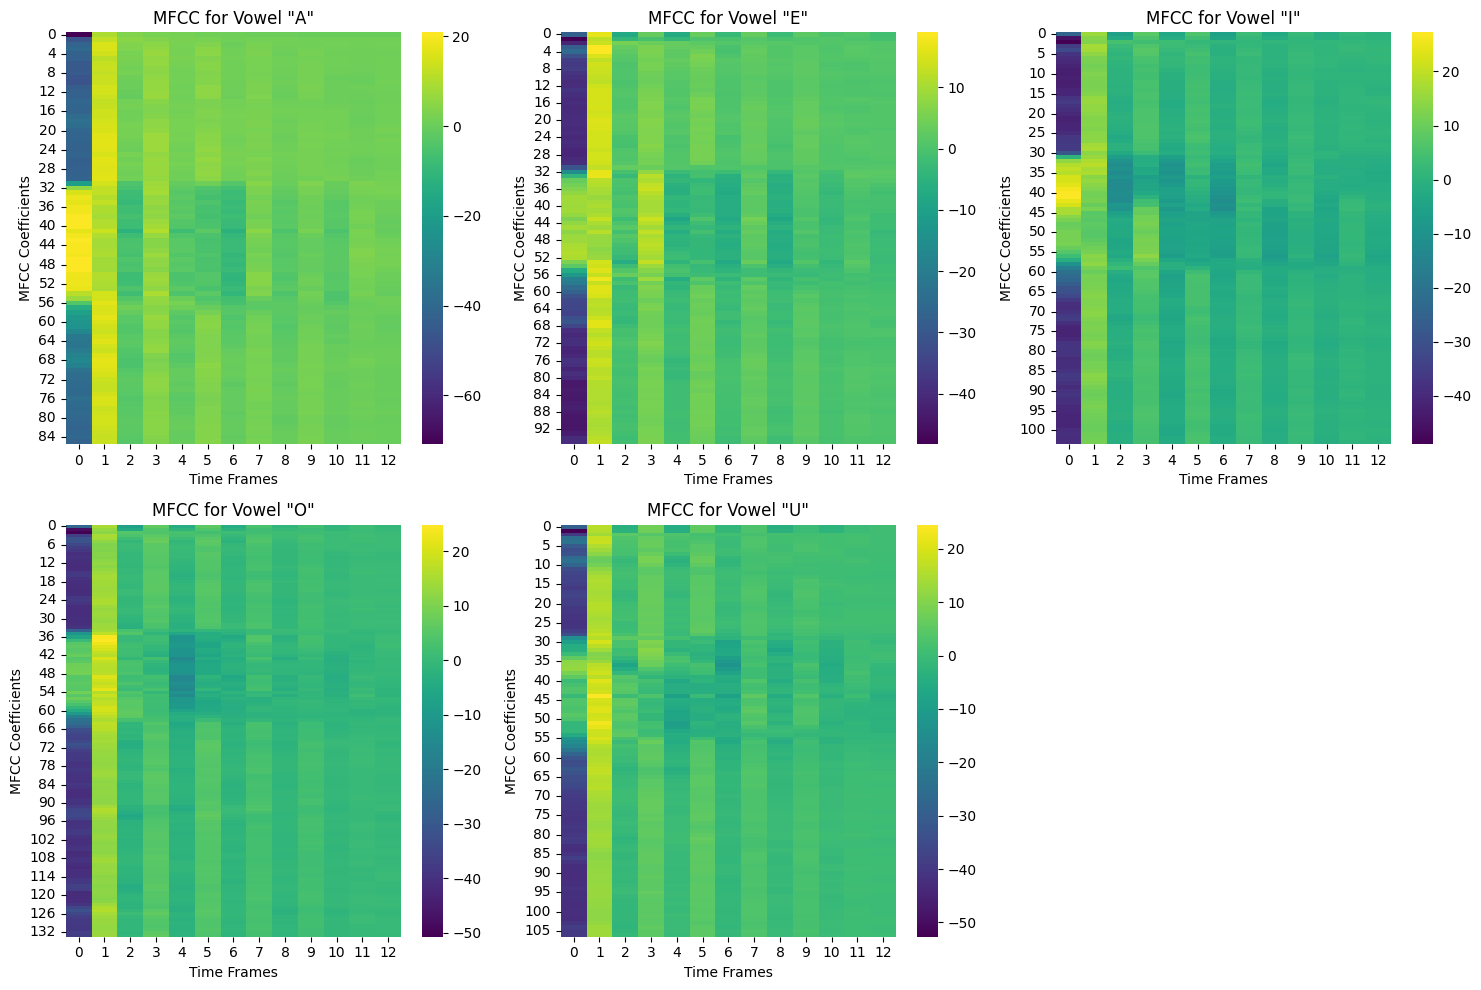

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy.signal import get_window
from scipy.fftpack import dct

# Set folder path and initialize lists
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"
audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]

# Check if files are found
if not audio_files:
    raise ValueError(f"No .wav or .m4a files found in: {folder_path}")

# Map vowels to numeric labels
label_map = {
    'a': 0,
    'e': 1,
    'i': 2,
    'o': 3,
    'u': 4
}

# MFCC parameters
n_mfcc = 13
n_fft = 2048
hop_length = 512
n_mels = 40
sample_rate = 22050  # Standard sample rate for speech

# Custom Mel filter bank
def mel_filter_bank(sr, n_fft, n_mels):
    fmin = 0
    fmax = sr / 2
    mel = np.linspace(0, np.log10(1 + fmax / 700), n_mels + 2)
    hz = 700 * (10 ** (mel) - 1)
    bins = np.floor((n_fft + 1) * hz / sr).astype(int)
    fbank = np.zeros((n_mels, n_fft // 2 + 1))
    for m in range(1, n_mels + 1):
        f_m_minus = bins[m - 1]
        f_m = bins[m]
        f_m_plus = bins[m + 1]
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - f_m_minus) / (f_m - f_m_minus)
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (f_m_plus - k) / (f_m_plus - f_m)
    return fbank

# Custom MFCC extraction
def compute_mfcc(signal, sr, n_mfcc=13, n_fft=2048, hop_length=512, n_mels=40):
    # Step 1: Framing
    frame_length = n_fft
    frames = []
    for i in range(0, len(signal) - frame_length, hop_length):
        frames.append(signal[i:i + frame_length])
    frames = np.array(frames)

    # Step 2: Windowing
    window = get_window("hamming", frame_length)
    frames *= window

    # Step 3: Fast Fourier Transform (FFT)
    fft_out = np.abs(fft(frames, n_fft)[:, :n_fft // 2 + 1]) ** 2

    # Step 4: Mel Filter Bank Application
    fbank = mel_filter_bank(sr, n_fft, n_mels)
    mel_spectrogram = np.dot(fft_out, fbank.T)

    # Step 5: Logarithm of Filter Bank Energies
    mel_spectrogram = np.where(mel_spectrogram == 0, np.finfo(float).eps, mel_spectrogram)
    log_mel_spectrogram = np.log(mel_spectrogram)

    # Step 6: Discrete Cosine Transform (DCT)
    mfcc = dct(log_mel_spectrogram, type=2, axis=1, norm='ortho')[:, :n_mfcc]
    return mfcc

# Initialize lists to store features and labels
mfcc_features_list = []
labels = []

# Extract MFCC features and labels
for file_name in audio_files:
    vowel = file_name.lower()[0]
    if vowel not in label_map:
        print(f"Skipping file {file_name}: Unknown vowel")
        continue
    file_path = os.path.join(folder_path, file_name)
    signal, sr = librosa.load(file_path, sr=sample_rate)
    
    # Compute custom MFCC
    mfcc_features = compute_mfcc(signal, sr, n_mfcc, n_fft, hop_length, n_mels)
    
    mfcc_features_list.append(mfcc_features)
    labels.append(label_map[vowel])

# Visualize MFCC features for each vowel
plt.figure(figsize=(15, 10))
for i, vowel in enumerate(label_map.keys()):
    for file_name, mfcc, label in zip(audio_files, mfcc_features_list, labels):
        if file_name.lower().startswith(vowel):
            print(i,vowel)
            plt.subplot(2, 3, i + 1)
            sns.heatmap(mfcc, cmap='viridis')
            plt.title(f'MFCC for Vowel "{vowel.upper()}"')
            plt.xlabel('Time Frames')
            plt.ylabel('MFCC Coefficients')
            break

plt.tight_layout()
plt.show()
plt.savefig('custom_mfcc_visualization.png')
plt.close()

In [12]:
mfcc_features

array([[-2.93577343e+01,  1.63265821e+01, -3.68745002e+00, ...,
        -2.67815473e+00, -3.44272248e-02,  7.82984036e-01],
       [-5.26875030e+01,  1.56896105e+01, -3.16904044e+00, ...,
        -2.66315870e+00, -9.49723562e-02,  8.02677346e-01],
       [-3.94701657e+01,  1.36032291e+01,  4.89273632e+00, ...,
         1.07621249e+00,  1.08152817e+00,  7.63385699e-01],
       ...,
       [-3.89249213e+01,  1.31443774e+01, -2.39405476e+00, ...,
        -1.43504769e-01,  1.30721262e-01, -2.00500791e-01],
       [-3.99550439e+01,  1.31507354e+01, -1.50827881e+00, ...,
        -3.81450499e-01,  9.34434222e-02,  7.61100690e-02],
       [-3.96841615e+01,  1.33405076e+01, -1.13453431e+00, ...,
        -1.78649328e-01,  1.96439056e-01,  2.18510880e-01]])

In [14]:
for i, vowel in enumerate(label_map.keys()):
    for file_name, mfcc, label in zip(audio_files, mfcc_features_list, labels):
        if file_name.lower().startswith(vowel):
            print(i,vowel)


0 a
1 e
2 i
3 o
4 u


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy.signal import get_window
from scipy.fftpack import dct
import librosa

# Set folder path and initialize lists
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"
audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]

# Check if files are found
if not audio_files:
    raise ValueError(f"No .wav or .m4a files found in: {folder_path}")

# Map vowels to numeric labels
label_map = {
    'a': 0,
    'e': 1,
    'i': 2,
    'o': 3,
    'u': 4
}

# MFCC parameters
n_mfcc = 13
n_fft = 2048
hop_length = 512
n_mels = 40
sample_rate = 22050

# Custom Mel filter bank
def mel_filter_bank(sr, n_fft, n_mels):
    fmin = 0
    fmax = sr / 2
    mel = np.linspace(0, np.log10(1 + fmax / 700), n_mels + 2)
    hz = 700 * (10 ** (mel) - 1)
    bins = np.floor((n_fft + 1) * hz / sr).astype(int)
    fbank = np.zeros((n_mels, n_fft // 2 + 1))
    for m in range(1, n_mels + 1):
        f_m_minus = bins[m - 1]
        f_m = bins[m]
        f_m_plus = bins[m + 1]
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - f_m_minus) / (f_m - f_m_minus)
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (f_m_plus - k) / (f_m_plus - f_m)
    return fbank

# Custom MFCC extraction
def compute_mfcc(signal, sr, n_mfcc=13, n_fft=2048, hop_length=512, n_mels=40):
    # Step 1: Framing
    frame_length = n_fft
    frames = []
    for i in range(0, len(signal) - frame_length, hop_length):
        frames.append(signal[i:i + frame_length])
    frames = np.array(frames)

    # Step 2: Windowing
    window = get_window("hamming", frame_length)
    frames *= window

    # Step 3: Fast Fourier Transform (FFT)
    fft_out = np.abs(fft(frames, n_fft)[:, :n_fft // 2 + 1]) ** 2

    # Step 4: Mel Filter Bank Application
    fbank = mel_filter_bank(sr, n_fft, n_mels)
    mel_spectrogram = np.dot(fft_out, fbank.T)

    # Step 5: Logarithm of Filter Bank Energies
    mel_spectrogram = np.where(mel_spectrogram == 0, np.finfo(float).eps, mel_spectrogram)
    log_mel_spectrogram = np.log(mel_spectrogram)

    # Step 6: Discrete Cosine Transform (DCT)
    mfcc = dct(log_mel_spectrogram, type=2, axis=1, norm='ortho')[:, :n_mfcc]
    return mfcc

# Extract MFCC features for vowel 'a'
mfcc_features_a = []
file_names_a = []

for file_name in audio_files:
    vowel = file_name.lower()[0]
    if vowel == 'a':  # Only process files for vowel 'a'
        file_path = os.path.join(folder_path, file_name)
        signal, sr = librosa.load(file_path, sr=sample_rate)
        mfcc_features = compute_mfcc(signal, sr, n_mfcc, n_fft, hop_length, n_mels)
        mfcc_features_a.append(mfcc_features)
        file_names_a.append(file_name)
    else:
        print(f"Skipping file {file_name}: Not vowel 'a'")

# Check if any 'a' files were found
if not mfcc_features_a:
    raise ValueError("No audio files for vowel 'a' found")

# Print MFCC features for inspection
for file_name, mfcc in zip(file_names_a, mfcc_features_a):
    print(f"\nMFCC Features for {file_name}:")
    print(f"Shape: {mfcc.shape}")
    print(f"First few frames:\n{mfcc[:5, :]}")  # Print first 5 frames

# Visualize MFCC features for vowel 'a'
plt.figure(figsize=(10, len(mfcc_features_a) * 4))
for i, (file_name, mfcc) in enumerate(zip(file_names_a, mfcc_features_a)):
    plt.subplot(len(mfcc_features_a), 1, i + 1)
    sns.heatmap(mfcc, cmap='viridis')
    plt.title(f'MFCC for Vowel "A" ({file_name})')
    plt.xlabel('Time Frames')
    plt.ylabel('MFCC Coefficients')

plt.tight_layout()
plt.savefig('mfcc_vowel_a_visualization.png')
plt.close()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\2080125135.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=sample_rate)


Skipping file e.m4a: Not vowel 'a'
Skipping file i.m4a: Not vowel 'a'
Skipping file o.m4a: Not vowel 'a'
Skipping file u.m4a: Not vowel 'a'

MFCC Features for a.m4a:
Shape: (86, 13)
First few frames:
[[-7.08792983e+01  9.71241480e+00  3.52045869e+00  2.15975314e+00
   1.53911379e+00  9.49580946e-01  7.24021825e-01  3.62019456e-01
   2.48142213e-01  4.13669068e-02 -5.49546370e-02 -1.68544978e-01
  -1.48030864e-01]
 [-4.70861454e+01  1.19486217e+01  4.65167863e+00  3.48460928e+00
   2.54866174e+00  1.98994955e+00  1.11716029e+00  1.29162645e+00
   1.23164546e+00  9.24683177e-01  1.01942558e+00  8.73220108e-01
   8.90672884e-01]
 [-4.15053014e+01  1.55904705e+01  3.67458235e+00  5.07254902e+00
   1.92489408e+00  3.54178186e+00  3.67220150e-01  2.00255257e+00
   1.13198499e+00  1.12499950e+00  1.25431988e+00  8.66869200e-01
   1.31988836e+00]
 [-3.99302994e+01  1.55418113e+01  2.97987388e+00  5.64119396e+00
   1.79823117e+00  4.42576753e+00  1.09261582e+00  2.60519144e+00
   6.14923737e-01

In [17]:
print(mfcc_features_list[0])


[[-7.08792983e+01  9.71241480e+00  3.52045869e+00 ... -5.49546370e-02
  -1.68544978e-01 -1.48030864e-01]
 [-4.70861454e+01  1.19486217e+01  4.65167863e+00 ...  1.01942558e+00
   8.73220108e-01  8.90672884e-01]
 [-4.15053014e+01  1.55904705e+01  3.67458235e+00 ...  1.25431988e+00
   8.66869200e-01  1.31988836e+00]
 ...
 [-4.11187965e+01  1.33290245e+01 -2.36410325e+00 ... -4.13879676e-01
   4.37390369e-01  4.24529542e-02]
 [-4.02881397e+01  1.28942579e+01 -2.91671876e+00 ... -5.68515492e-01
   3.17572655e-01 -1.39735781e-01]
 [-4.22927741e+01  1.31533774e+01 -3.17973341e+00 ... -4.83642286e-01
   4.20257838e-02 -1.10619074e-01]]


In [18]:
print(mfcc_features_list[labels.index(label_map['a'])])


[[-7.08792983e+01  9.71241480e+00  3.52045869e+00 ... -5.49546370e-02
  -1.68544978e-01 -1.48030864e-01]
 [-4.70861454e+01  1.19486217e+01  4.65167863e+00 ...  1.01942558e+00
   8.73220108e-01  8.90672884e-01]
 [-4.15053014e+01  1.55904705e+01  3.67458235e+00 ...  1.25431988e+00
   8.66869200e-01  1.31988836e+00]
 ...
 [-4.11187965e+01  1.33290245e+01 -2.36410325e+00 ... -4.13879676e-01
   4.37390369e-01  4.24529542e-02]
 [-4.02881397e+01  1.28942579e+01 -2.91671876e+00 ... -5.68515492e-01
   3.17572655e-01 -1.39735781e-01]
 [-4.22927741e+01  1.31533774e+01 -3.17973341e+00 ... -4.83642286e-01
   4.20257838e-02 -1.10619074e-01]]


In [20]:
print(mfcc_features_list[labels.index(label_map['e'])])


[[-2.79135232e+01  1.64625433e+01 -7.73892780e+00 ... -6.00343011e-03
   6.59018232e-01 -1.34003361e+00]
 [-4.82646201e+01  1.23019820e+01 -3.82359466e+00 ...  8.65496075e-01
   6.60764845e-02 -1.07264575e+00]
 [-4.14936871e+01  1.36948032e+01  4.88955058e+00 ...  7.38567463e-01
   8.98681367e-01  8.40089989e-01]
 ...
 [-4.28206024e+01  1.10051563e+01 -1.48203260e+00 ... -6.84443683e-01
   6.05238312e-01  1.05131494e-01]
 [-4.00108402e+01  1.20153091e+01 -2.09688818e+00 ... -7.38849039e-01
   2.65549842e-01 -5.96606135e-02]
 [-3.97735597e+01  1.28124495e+01 -1.35174835e+00 ... -6.30996254e-01
   1.03128976e-01  1.21766388e-01]]


## MFCC Features model

In [24]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Read speech signals from folder
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"  # ✅ Adjust path if needed
audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]

# Check if files are found
if not audio_files:
    raise ValueError(f"No .wav or .m4a files found in: {folder_path}")

# Map vowels to numeric labels
label_map = {
    'a': 0,
    'e': 1,
    'i': 2,
    'o': 3,
    'u': 4
}

X_list = []
y_list = []

# Extract features and labels
for file_name in audio_files:
    file_path = os.path.join(folder_path, file_name)
    signal, sr = librosa.load(file_path, sr=None)
    mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13).T

    key = os.path.splitext(file_name)[0].lower()  # e.g., 'a' from 'a.m4a'
    if key in label_map:
        label = label_map[key]
    else:
        raise ValueError(f"Cannot determine class for file: {file_name}")
    
    X_list.append(mfcc_features)
    y_list.extend([label] * len(mfcc_features))






C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\1107584866.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=None)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [25]:
# Step 2: Train/Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Evaluate
y_pred = clf.predict(X_test)


In [26]:
y_pred

array([4])

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[0 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy: 0.0


C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [29]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib  # for saving model

# Step 1: Read speech signals from folder
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"  # ✅ Change if needed
audio_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]

# Check if files are found
if not audio_files:
    raise ValueError(f"No .wav or .m4a files found in: {folder_path}")

# Vowel to numeric label mapping
label_map = {'a': 0, 'e': 1, 'i': 2, 'o': 3, 'u': 4}
inv_label_map = {v: k for k, v in label_map.items()}

X_list = []
y_list = []

# Step 2: Extract MFCC features and labels
for file_name in audio_files:
    file_path = os.path.join(folder_path, file_name)
    signal, sr = librosa.load(file_path, sr=None)
    mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13).T

    key = os.path.splitext(file_name)[0].lower()  # assumes filename starts with vowel
    if key in label_map:
        label = label_map[key]
    else:
        print(f"Skipping file {file_name} — Unknown vowel label")
        continue

    X_list.append(mfcc_features)
    y_list.extend([label] * len(mfcc_features))

# Step 3: Prepare dataset
X = np.vstack(X_list)           
y = np.array(y_list)          

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = clf.predict(X_test)

print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_map.keys()))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Step 7: Save Model
joblib.dump(clf, "vowel_classifier.pkl")
print("✅ Model saved as 'vowel_classifier.pkl'")


C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\3412550707.py:27: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=None)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Classification Report:

              precision    recall  f1-score   support

           a       0.97      0.86      0.91        36
           e       0.88      0.86      0.87        50
           i       0.74      0.57      0.64        49
           o       0.69      0.86      0.77        59
           u       0.82      0.84      0.83        44

    accuracy                           0.80       238
   macro avg       0.82      0.80      0.80       238
weighted avg       0.81      0.80      0.80       238

Accuracy: 0.7983193277310925
Precision: 0.8054527483959784
Recall: 0.7983193277310925
F1 Score: 0.7967667760287346
✅ Model saved as 'vowel_classifier.pkl'


# Task 2

In [31]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


In [33]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
folder_path = r"C:\Users\PMLS\Documents\Sound recordings\vowel_data"  # Update if needed
vowels = ['a', 'e', 'i', 'o', 'u']
frame_durations_ms = [15, 25, 40]
overlap_percents = [0, 0.25, 0.5]
n_mfcc = 13
n_mels = 40
sample_rate = 22050


In [34]:
# Collect one file per vowel
vowel_files = {}
for file in os.listdir(folder_path):
    if file.lower().endswith(('.wav', '.m4a')):
        v = file.lower()[0]
        if v in vowels and v not in vowel_files:
            vowel_files[v] = os.path.join(folder_path, file)

# Check
if len(vowel_files) < 5:
    raise ValueError("Not all vowel files found in the folder.")


In [ ]:
for vowel, file_path in vowel_files.items():
    signal, sr = librosa.load(file_path, sr=sample_rate)

    fig, axes = plt.subplots(len(frame_durations_ms), len(overlap_percents), figsize=(15, 10))
    fig.suptitle(f'MFCCs for Vowel "{vowel.upper()}" with Varying Frame Sizes and Overlaps', fontsize=16)

    for i, duration_ms in enumerate(frame_durations_ms):
        frame_length = int(sr * (duration_ms / 1000))
        for j, overlap in enumerate(overlap_percents):
            hop_length = int(frame_length * (1 - overlap))

            mfccs = librosa.feature.mfcc(
                y=signal,
                sr=sr,
                n_mfcc=n_mfcc,
                n_fft=frame_length,
                hop_length=hop_length,
                n_mels=n_mels
            )

            ax = axes[i, j]
            sns.heatmap(mfccs, ax=ax, cmap='viridis')
            ax.set_title(f'{duration_ms}ms Frame, {int(overlap * 100)}% Overlap')
            ax.set_xlabel('Time Frames')
            ax.set_ylabel('MFCC Coefficients')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'mfcc_vowel_{vowel}_comparison.png')
    plt.close()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\393977980.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=sample_rate)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\393977980.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=sample_rate)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_17352\393977980.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=sample_rate)
C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated 